In [1]:
from dataset_creation import create_dataset

from utils import get_taxonomy_leaves, get_yamnet_classes

taxonomy_names, yamnet_names = get_taxonomy_leaves(), get_yamnet_classes()

dataset = create_dataset()
len(dataset)

2023-12-22 15:58:27.186665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 15:58:27.567085: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-22 15:58:27.567114: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-22 15:58:29.185697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

216

In [2]:
embeddings = [el.get_yamnet_embeddings() for el in dataset]
embeddings[0].shape, embeddings[0]

2023-12-22 15:58:38.318215: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


(TensorShape([61, 1024]),
 <tf.Tensor: shape=(61, 1024), dtype=float32, numpy=
 array([[0.0000000e+00, 1.2737225e-01, 9.7548467e-04, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 3.0008632e-01, 1.0285262e-01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.1675718e-01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 1.0036316e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 5.1528674e-01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.6706948e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32)>)

In [3]:
labels = [el.labels_array for el in dataset]
len(labels), labels[0].shape 

(216, (61, 30))

In [4]:
from utils import split_train_test

train_x, train_y, test_x, test_y = split_train_test(embeddings, labels)
train_x = train_x.numpy()
train_y = train_y.numpy()
test_x = test_x.numpy()
test_y = test_y.numpy()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((6921, 1024), (6921, 30), (1625, 1024), (1625, 30))

# Train the model

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
multilabel_model = OneVsRestClassifier(clf)
multilabel_model.fit(train_x, train_y)

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



OneVsRestClassifier(estimator=GradientBoostingClassifier(random_state=0))

In [6]:
multilabel_model.score(test_x, test_y)

0.52

In [7]:
pred_y = multilabel_model.predict(test_x)

# Model evaluation

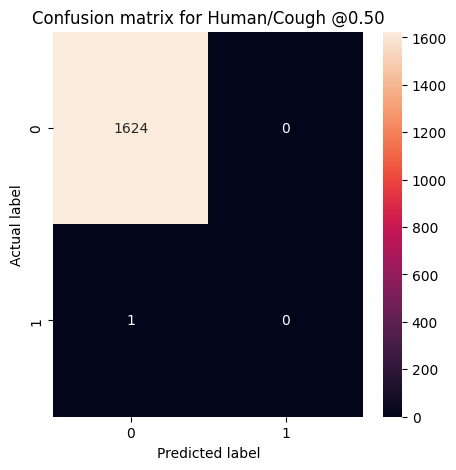

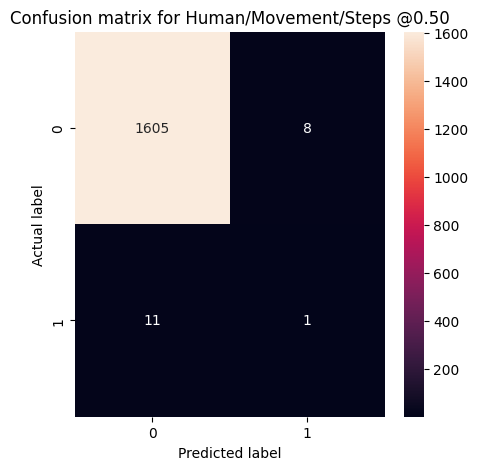

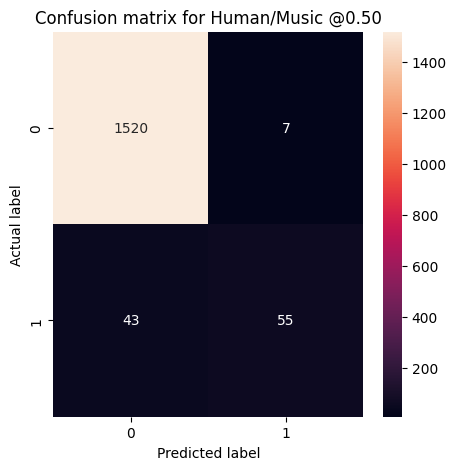

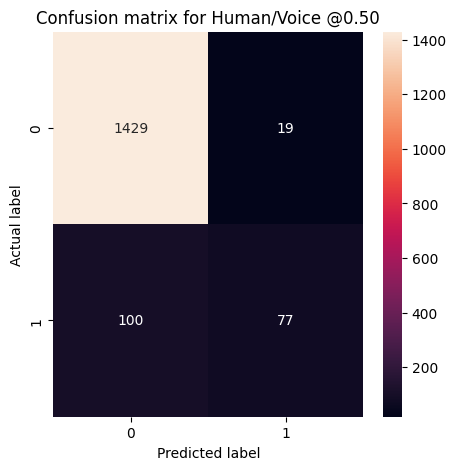

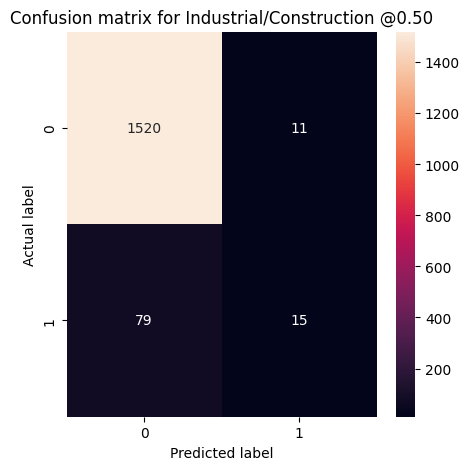

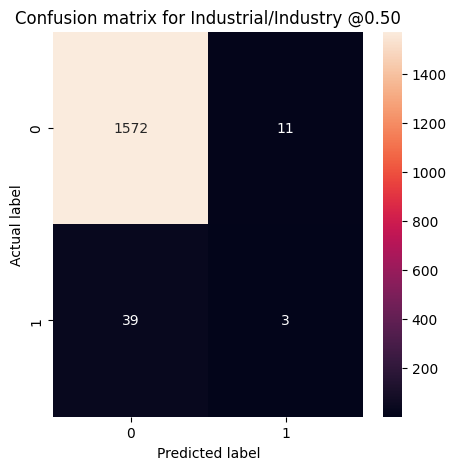

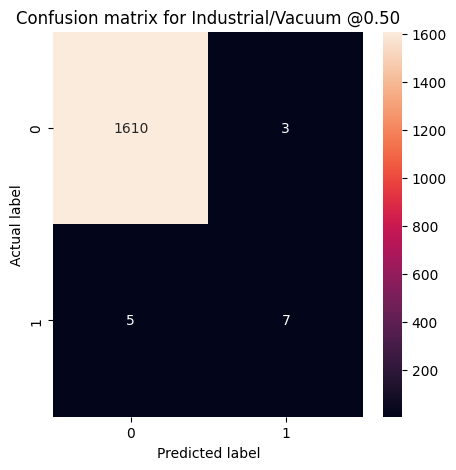

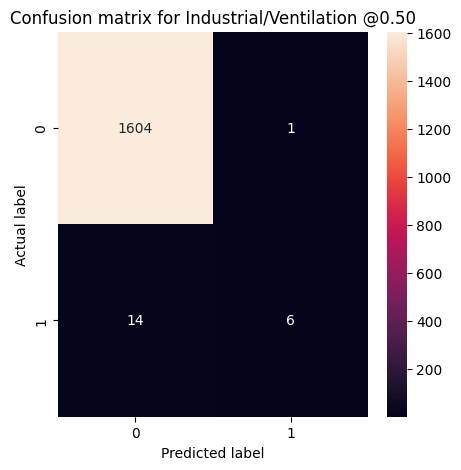

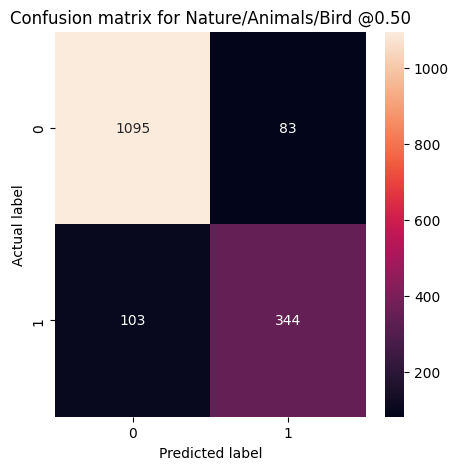

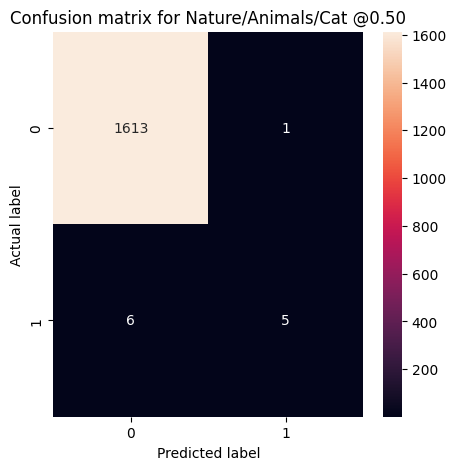

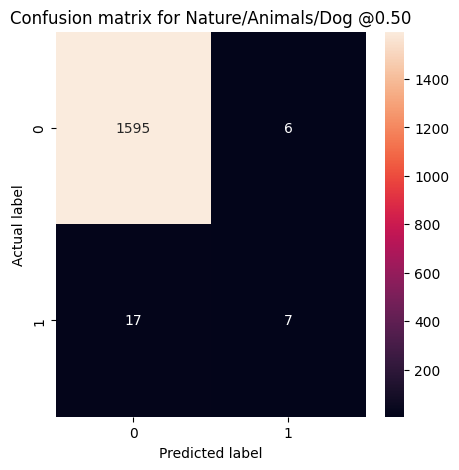

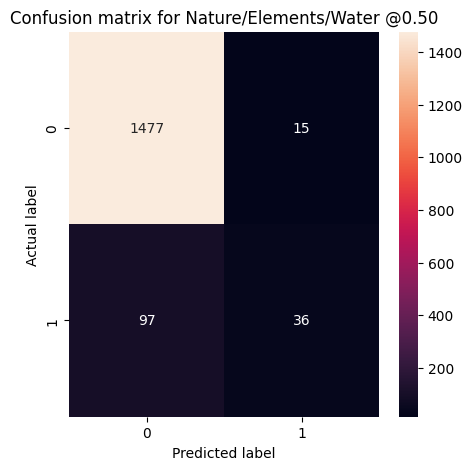

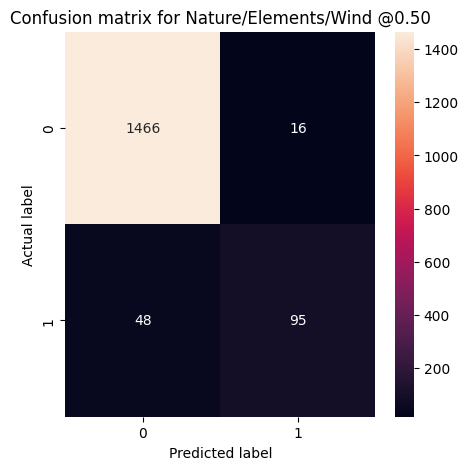

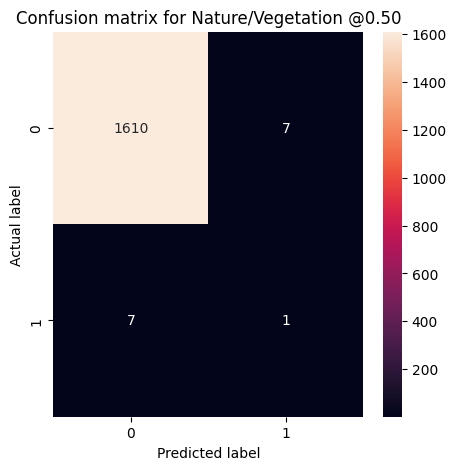

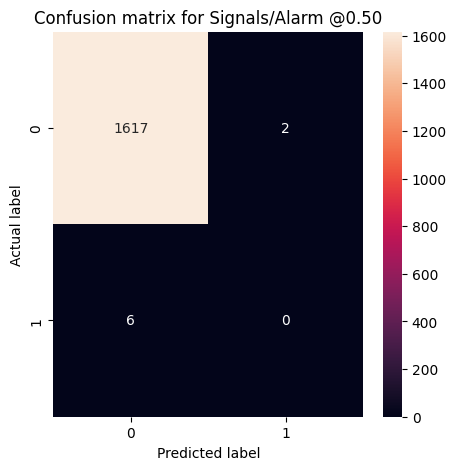

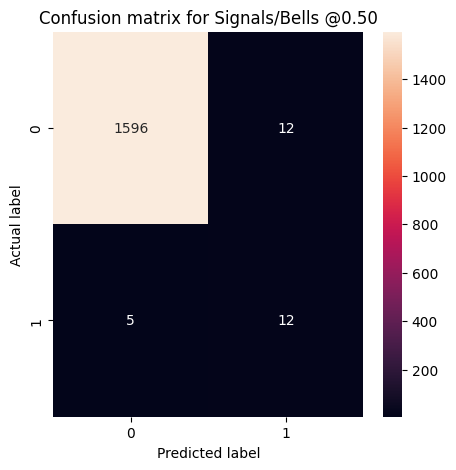

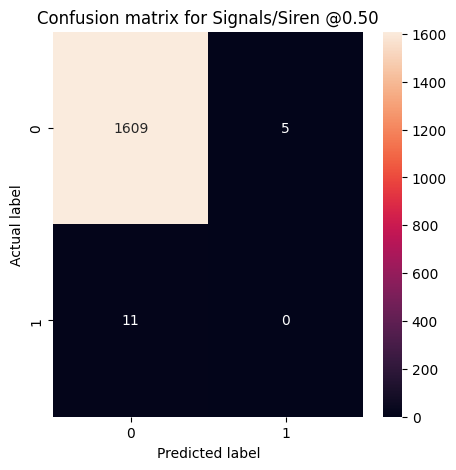

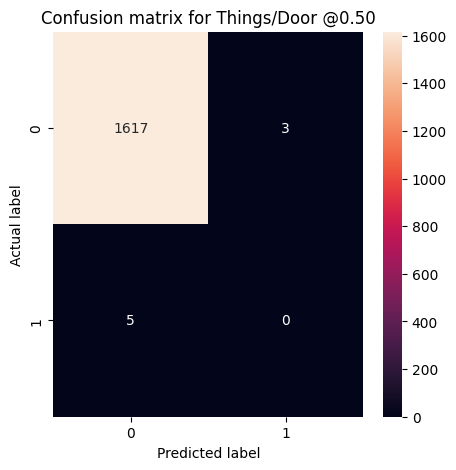

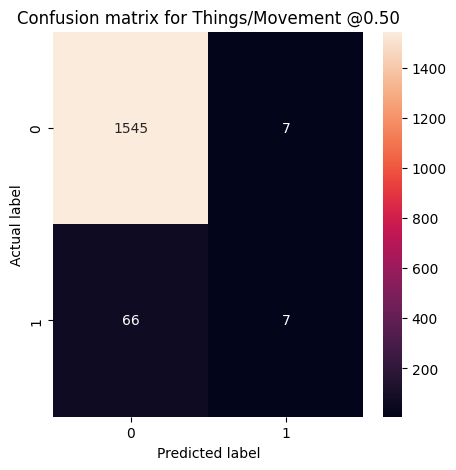

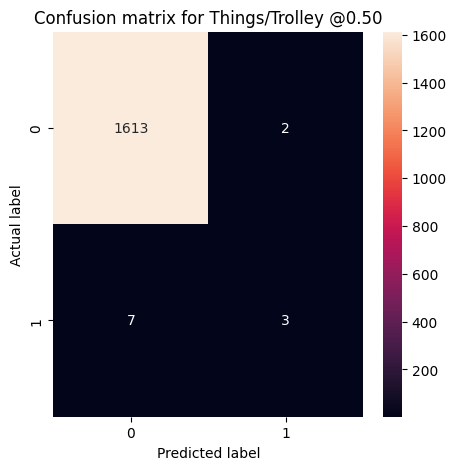

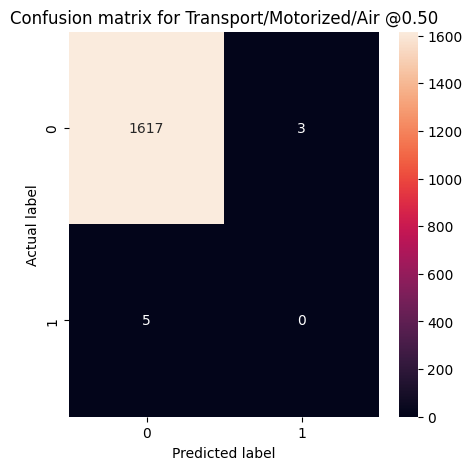

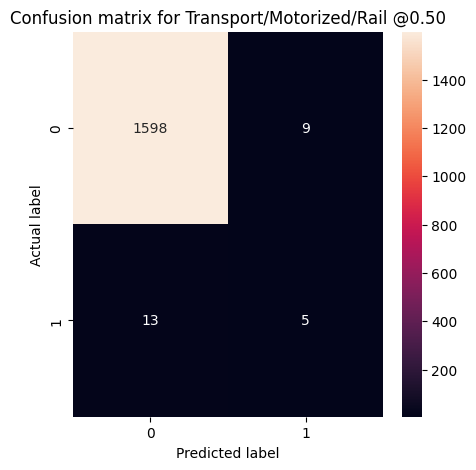

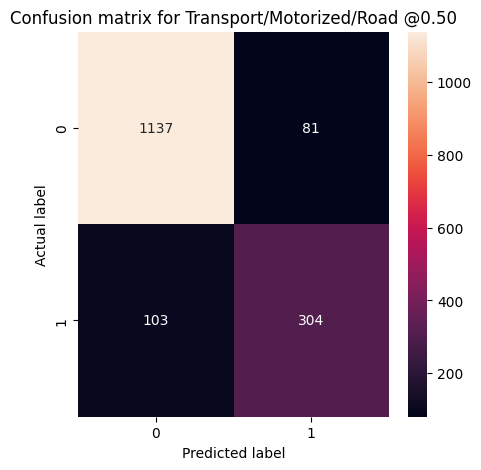

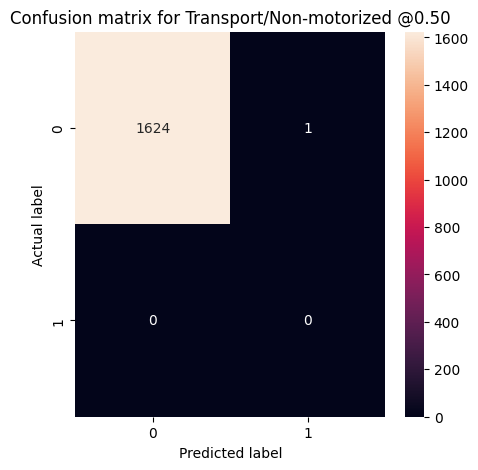

  warnings.warn("y_pred contains classes not in y_true")



Metrics:
	accuracy: 0.5200
	balanced_accuracy: 0.7277
	precision_macro: 0.3587
	recall_macro: 0.2299
	f1_macro: 0.2676
	precision_micro: 0.7585
	recall_micro: 0.5541
	f1_micro: 0.6404
Per-class metrics:
	Human/Cough:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Human/Movement/Steps:
		precision: 0.1111
		recall: 0.0833
		f1: 0.0952
	Human/Music:
		precision: 0.8871
		recall: 0.5612
		f1: 0.6875
	Human/Voice:
		precision: 0.8021
		recall: 0.4350
		f1: 0.5641
	Industrial/Construction:
		precision: 0.5769
		recall: 0.1596
		f1: 0.2500
	Industrial/Industry:
		precision: 0.2143
		recall: 0.0714
		f1: 0.1071
	Industrial/Vacuum:
		precision: 0.7000
		recall: 0.5833
		f1: 0.6364
	Industrial/Ventilation:
		precision: 0.8571
		recall: 0.3000
		f1: 0.4444
	Nature/Animals/Bird:
		precision: 0.8056
		recall: 0.7696
		f1: 0.7872
	Nature/Animals/Cat:
		precision: 0.8333
		recall: 0.4545
		f1: 0.5882
	Nature/Animals/Cricket:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Animals/Dog:


In [8]:
from evaluate import evaluate

evaluate(test_y, pred_y, threshold=0.5)

In [9]:
for threshold in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print(f"Threshold: {threshold}")
    evaluate(test_y, pred_y, threshold=threshold, plot_confusion_matrices=False)

  warnings.warn("y_pred contains classes not in y_true")



Threshold: 0.1
Metrics:
	accuracy: 0.5200
	balanced_accuracy: 0.7277
	precision_macro: 0.3587
	recall_macro: 0.2299
	f1_macro: 0.2676
	precision_micro: 0.7585
	recall_micro: 0.5541
	f1_micro: 0.6404


  warnings.warn("y_pred contains classes not in y_true")



Per-class metrics:
	Human/Cough:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Human/Movement/Steps:
		precision: 0.1111
		recall: 0.0833
		f1: 0.0952
	Human/Music:
		precision: 0.8871
		recall: 0.5612
		f1: 0.6875
	Human/Voice:
		precision: 0.8021
		recall: 0.4350
		f1: 0.5641
	Industrial/Construction:
		precision: 0.5769
		recall: 0.1596
		f1: 0.2500
	Industrial/Industry:
		precision: 0.2143
		recall: 0.0714
		f1: 0.1071
	Industrial/Vacuum:
		precision: 0.7000
		recall: 0.5833
		f1: 0.6364
	Industrial/Ventilation:
		precision: 0.8571
		recall: 0.3000
		f1: 0.4444
	Nature/Animals/Bird:
		precision: 0.8056
		recall: 0.7696
		f1: 0.7872
	Nature/Animals/Cat:
		precision: 0.8333
		recall: 0.4545
		f1: 0.5882
	Nature/Animals/Cricket:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Animals/Dog:
		precision: 0.5385
		recall: 0.2917
		f1: 0.3784
	Nature/Animals/Sheep:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Elements/Thunder:
		precision: 0.0000
		recall: 0.000

  warnings.warn("y_pred contains classes not in y_true")



Per-class metrics:
	Human/Cough:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Human/Movement/Steps:
		precision: 0.1111
		recall: 0.0833
		f1: 0.0952
	Human/Music:
		precision: 0.8871
		recall: 0.5612
		f1: 0.6875
	Human/Voice:
		precision: 0.8021
		recall: 0.4350
		f1: 0.5641
	Industrial/Construction:
		precision: 0.5769
		recall: 0.1596
		f1: 0.2500
	Industrial/Industry:
		precision: 0.2143
		recall: 0.0714
		f1: 0.1071
	Industrial/Vacuum:
		precision: 0.7000
		recall: 0.5833
		f1: 0.6364
	Industrial/Ventilation:
		precision: 0.8571
		recall: 0.3000
		f1: 0.4444
	Nature/Animals/Bird:
		precision: 0.8056
		recall: 0.7696
		f1: 0.7872
	Nature/Animals/Cat:
		precision: 0.8333
		recall: 0.4545
		f1: 0.5882
	Nature/Animals/Cricket:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Animals/Dog:
		precision: 0.5385
		recall: 0.2917
		f1: 0.3784
	Nature/Animals/Sheep:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Elements/Thunder:
		precision: 0.0000
		recall: 0.000

  warnings.warn("y_pred contains classes not in y_true")



Per-class metrics:
	Human/Cough:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Human/Movement/Steps:
		precision: 0.1111
		recall: 0.0833
		f1: 0.0952
	Human/Music:
		precision: 0.8871
		recall: 0.5612
		f1: 0.6875
	Human/Voice:
		precision: 0.8021
		recall: 0.4350
		f1: 0.5641
	Industrial/Construction:
		precision: 0.5769
		recall: 0.1596
		f1: 0.2500
	Industrial/Industry:
		precision: 0.2143
		recall: 0.0714
		f1: 0.1071
	Industrial/Vacuum:
		precision: 0.7000
		recall: 0.5833
		f1: 0.6364
	Industrial/Ventilation:
		precision: 0.8571
		recall: 0.3000
		f1: 0.4444
	Nature/Animals/Bird:
		precision: 0.8056
		recall: 0.7696
		f1: 0.7872
	Nature/Animals/Cat:
		precision: 0.8333
		recall: 0.4545
		f1: 0.5882
	Nature/Animals/Cricket:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Animals/Dog:
		precision: 0.5385
		recall: 0.2917
		f1: 0.3784
	Nature/Animals/Sheep:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Elements/Thunder:
		precision: 0.0000
		recall: 0.000

  warnings.warn("y_pred contains classes not in y_true")



Per-class metrics:
	Human/Cough:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Human/Movement/Steps:
		precision: 0.1111
		recall: 0.0833
		f1: 0.0952
	Human/Music:
		precision: 0.8871
		recall: 0.5612
		f1: 0.6875
	Human/Voice:
		precision: 0.8021
		recall: 0.4350
		f1: 0.5641
	Industrial/Construction:
		precision: 0.5769
		recall: 0.1596
		f1: 0.2500
	Industrial/Industry:
		precision: 0.2143
		recall: 0.0714
		f1: 0.1071
	Industrial/Vacuum:
		precision: 0.7000
		recall: 0.5833
		f1: 0.6364
	Industrial/Ventilation:
		precision: 0.8571
		recall: 0.3000
		f1: 0.4444
	Nature/Animals/Bird:
		precision: 0.8056
		recall: 0.7696
		f1: 0.7872
	Nature/Animals/Cat:
		precision: 0.8333
		recall: 0.4545
		f1: 0.5882
	Nature/Animals/Cricket:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Animals/Dog:
		precision: 0.5385
		recall: 0.2917
		f1: 0.3784
	Nature/Animals/Sheep:
		precision: 0.0000
		recall: 0.0000
		f1: 0.0000
	Nature/Elements/Thunder:
		precision: 0.0000
		recall: 0.000

In [10]:
import pickle

with open("ml_models/multilabel_sklearn_model.pkl", "wb") as f:
    pickle.dump(multilabel_model, f)